In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np

In [3]:
df = pd.read_csv('Car_sales.csv')

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
odf = pd.get_dummies(df, columns=['Manufacturer','Model','Vehicle_type'])

In [11]:
odf

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,...,1,0,0,0,0,0,0,0,0,1
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,...,0,0,0,0,0,0,0,0,0,1
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,...,0,1,0,0,0,0,0,0,0,1
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,...,0,0,0,0,0,0,0,0,0,1


In [7]:
odf.drop(['Length'], axis=1, inplace=True)

In [8]:
odf.isnull().sum()

Sales_in_thousands         0
__year_resale_value       36
Price_in_thousands         2
Engine_size                1
Horsepower                 1
                          ..
Model_Windstar             0
Model_Wrangler             0
Model_Xterra               0
Vehicle_type_Car           0
Vehicle_type_Passenger     0
Length: 200, dtype: int64

In [10]:
odf['__year_resale_value'].fillna(odf['__year_resale_value'].mean(),inplace=True)
odf['Price_in_thousands'].fillna(odf['Price_in_thousands'].mean(),inplace=True)
odf['Engine_size'].fillna(odf['Engine_size'].mean(),inplace=True)
odf['Wheelbase'].fillna(odf['Wheelbase'].mean(),inplace=True)
odf['Width'].fillna(odf['Width'].mean(),inplace=True)
odf['Curb_weight'].fillna(odf['Curb_weight'].mean(),inplace=True)
odf['Fuel_capacity'].fillna(odf['Fuel_capacity'].mean(),inplace=True)
odf['Fuel_efficiency'].fillna(odf['Fuel_efficiency'].mean(),inplace=True)
# odf['Latest_Launch'].fillna(odf['Latest_Launch'].mean(),inplace=True)


In [11]:
odf['Latest_Launch'] = pd.to_datetime(df['Latest_Launch']).apply(lambda x: x.timestamp()).astype(float)

In [12]:
odf['Latest_Launch'].fillna(odf['Latest_Launch'].mean(),inplace=True)

In [30]:
odf['Latest_Launch'].fillna(odf['Latest_Launch'].mean(),inplace=True)

In [35]:
odf['Latest_Launch'].unique()

array(['1970-01-01T00:00:01.328140800', '1970-01-01T00:00:01.307059200',
       '1970-01-01T00:00:01.325635200', '1970-01-01T00:00:01.299715200',
       '1970-01-01T00:00:01.318032000', '1970-01-01T00:00:01.312848000',
       '1970-01-01T00:00:01.330300800', '1970-01-01T00:00:01.309219200',
       '1970-01-01T00:00:01.327795200', '1970-01-01T00:00:01.301875200',
       '1970-01-01T00:00:01.320192000', '1970-01-01T00:00:01.315008000',
       '1970-01-01T00:00:01.332460800', '1970-01-01T00:00:01.311379200',
       '1970-01-01T00:00:01.329955200', '1970-01-01T00:00:01.304035200',
       '1970-01-01T00:00:01.322352000', '1970-01-01T00:00:01.317168000',
       '1970-01-01T00:00:01.334620800', '1970-01-01T00:00:01.313539200',
       '1970-01-01T00:00:01.332115200', '1970-01-01T00:00:01.306195200',
       '1970-01-01T00:00:01.324512000', '1970-01-01T00:00:01.319328000',
       '1970-01-01T00:00:01.336780800', '1970-01-01T00:00:01.315699200',
       '1970-01-01T00:00:01.334275200', '1970-01-01

In [32]:
odf.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,2.639,13.2,28.0,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,3.517,17.2,25.0,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.390755,3.2,225.0,106.9,70.6,3.470,17.2,26.0,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,3.850,18.0,22.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,2.998,16.4,27.0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Replace NaN values with mean
# X = imputer.fit_transform(X)

X = odf.drop('Sales_in_thousands', axis=1)
y = odf['Sales_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.nan_to_num(X_train, nan=0, posinf=1e10, neginf=-1e10)

In [17]:
X_train

array([[ 9.575, 11.528,  2.4  , ...,  0.   ,  1.   ,  0.   ],
       [13.74 , 25.3  ,  3.8  , ...,  0.   ,  0.   ,  1.   ],
       [ 8.325, 13.987,  1.8  , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [22.525, 39.895,  4.6  , ...,  0.   ,  0.   ,  1.   ],
       [26.05 , 31.75 ,  2.3  , ...,  0.   ,  0.   ,  1.   ],
       [11.295, 20.39 ,  2.4  , ...,  0.   ,  0.   ,  1.   ]])

In [18]:
odf.isna().any()


Sales_in_thousands        False
__year_resale_value       False
Price_in_thousands        False
Engine_size               False
Horsepower                 True
                          ...  
Model_Windstar            False
Model_Wrangler            False
Model_Xterra              False
Vehicle_type_Car          False
Vehicle_type_Passenger    False
Length: 200, dtype: bool

In [19]:
odf.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
Sales_in_thousands,1.000000,-2.664355e-01,-0.304413,0.019983,-0.197756,0.358179,0.140918,0.008620,0.086540,-0.016747,...,-5.838775e-02,-4.187491e-02,-0.038511,-0.061492,-0.034054,0.121360,0.003021,1.369487e-03,0.242183,-0.242183
__year_resale_value,-0.266436,1.000000e+00,0.822395,0.468781,0.696936,-0.047803,0.159580,0.297130,0.275026,-0.358137,...,1.845559e-17,1.845559e-17,-0.026210,0.323007,-0.048359,-0.039163,-0.036765,1.845559e-17,-0.077119,0.077119
Price_in_thousands,-0.304413,8.223949e-01,1.000000,0.626839,0.838450,0.110511,0.329109,0.523753,0.423230,-0.491489,...,-1.684636e-02,7.938013e-03,-0.027492,0.238461,-0.048108,-0.033688,-0.072837,-2.586449e-02,-0.043695,0.043695
Engine_size,0.019983,4.687811e-01,0.626839,1.000000,0.837360,0.472130,0.690398,0.754668,0.663022,-0.733920,...,-8.954544e-02,-5.097811e-02,0.018443,0.380976,-0.050978,-0.004697,-0.043265,1.844310e-02,0.256543,-0.256543
Horsepower,-0.197756,6.969360e-01,0.838450,0.837360,1.000000,0.286308,0.539158,0.605226,0.499907,-0.610648,...,-3.687746e-02,-2.550812e-02,-0.022666,0.375261,-0.051089,-0.051089,-0.093724,-2.266579e-02,0.004689,-0.004689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Model_Windstar,0.121360,-3.916333e-02,-0.033688,-0.004697,-0.051089,0.139332,0.127222,0.049103,0.166800,-0.053861,...,-6.410256e-03,-6.410256e-03,-0.006410,-0.006410,-0.006410,1.000000,-0.006410,-6.410256e-03,0.134671,-0.134671
Model_Wrangler,0.003021,-3.676459e-02,-0.072837,-0.043265,-0.093724,-0.148552,-0.103879,-0.042699,0.021722,-0.129611,...,-6.410256e-03,-6.410256e-03,-0.006410,-0.006410,-0.006410,-0.006410,1.000000,-6.410256e-03,0.134671,-0.134671
Model_Xterra,0.001369,1.845559e-17,-0.025864,0.018443,-0.022666,-0.033609,-0.017508,0.056796,0.030012,-0.110674,...,-6.410256e-03,-6.410256e-03,-0.006410,-0.006410,-0.006410,-0.006410,-0.006410,1.000000e+00,0.134671,-0.134671
Vehicle_type_Car,0.242183,-7.711854e-02,-0.043695,0.256543,0.004689,0.384474,0.243941,0.517434,0.592026,-0.568540,...,-4.759931e-02,-4.759931e-02,0.134671,-0.047599,0.134671,0.134671,0.134671,1.346712e-01,1.000000,-1.000000


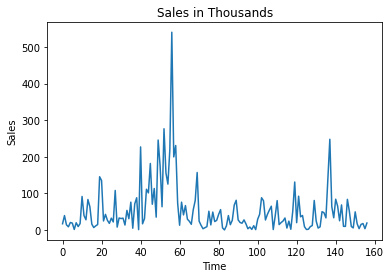

In [20]:

import matplotlib.pyplot as plt

# plot the sales data
plt.plot(odf['Sales_in_thousands'])
plt.title('Sales in Thousands')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [40]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
# # X_train.fillna(X_train.median(), inplace=True)
# print(np.any(np.isnan(X_train)))
# print(np.all(np.isfinite(X_train)))
# gbr.fit(X_train, y_train)
# y_pred = gbr.predict(X_test)
# score = r2_score(y_test, y_pred)

# print(f"Accuracy score: {score}")

from sklearn.metrics import r2_score

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fill missing values if necessary
# X_train.fillna(X_train.median(), inplace=True)

print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

# Print predicted values
print("Predicted values:")
print(y_pred)

score = r2_score(y_test, y_pred)

# Print accuracy score
print(f"Accuracy score: {score}")


False
True
Predicted values:
[  2.99872054  71.76635564  54.4122077   23.11291917  21.07432085
  35.0238795    3.89083049   9.06070688  99.86009672  39.9493069
  51.04132676 160.74213014  15.39026147  24.59666505  17.32107025
  72.47517573   0.85866469  68.77821027  15.7583419   24.62696318
  63.88837497  43.77125819  30.44211681  18.56210835  48.82079362
  47.73520129 159.23207543  19.3153464   28.14867564  15.7583419
  40.85122678  19.01944153  36.16184707 128.11387252   1.20026328
  23.23046971  24.95913371 110.26159854  59.55052029  18.40687069
  54.05180875  48.7875968   37.85737036  45.54452107  55.07196401
  16.32947533  75.89926123  70.59135783]
Accuracy score: 0.31009932413332897


In [24]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# endog = odf['Sales_in_thousands']
# model = SARIMAX(endog, order=(2,1,1), seasonal_order=(1,1,1,12))
# result = model.fit()# Get actual values
# actual = odf['Sales_in_thousands'][50:101]
# pred = model.predict()

# # Compute MAPE
# mape = np.mean(np.abs((actual - pred) / actual)) * 100


from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the endogenous variable
endog = odf['Sales_in_thousands']

# Fit a SARIMA model with order=(2,1,1) and seasonal_order=(1,1,1,12)
model = SARIMAX(endog, order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Make predictions
start_idx = 50
end_idx = 100
pred = result.predict(start=start_idx, end=end_idx, dynamic=False)

# Get actual values
actual = odf['Sales_in_thousands'][start_idx:end_idx+1]

# Compute MAPE
mape = np.mean(np.abs((actual - pred) / actual)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")




Mean Absolute Percentage Error (MAPE): 605.29%


In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the endogenous variable
endog = odf['Sales_in_thousands']

# Fit a SARIMA model with order=(2,1,1) and seasonal_order=(1,1,1,12)
model = SARIMAX(endog, order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Make predictions
start_idx = 50
end_idx = 100
pred = result.predict(start=start_idx, end=end_idx, dynamic=False)

# Convert pred to a NumPy array
pred = np.array(pred)

# Print predicted values
print("Predicted values:")
for i in range(len(pred)):
    print(f"Time step {i+start_idx}: {pred[i]}")



Predicted values:
Time step 50: 145.07666073035278
Time step 51: 144.19938370522206
Time step 52: 144.00472824734584
Time step 53: 124.43583974870035
Time step 54: 144.89443171681998
Time step 55: 177.83425411231786
Time step 56: 173.37352219313308
Time step 57: 328.9713424648511
Time step 58: 260.7156412916569
Time step 59: 199.1230999188515
Time step 60: 109.94761714004345
Time step 61: 142.66855042902623
Time step 62: 99.08313448585731
Time step 63: 47.49915262539713
Time step 64: 151.48357888512604
Time step 65: 54.847738625344775
Time step 66: 37.4666383710839
Time step 67: 118.84733729177094
Time step 68: 186.31712447365368
Time step 69: 66.25684351455175
Time step 70: 119.05474329906454
Time step 71: 66.23394649614949
Time step 72: 0.2747122687061889
Time step 73: 89.20642546969333
Time step 74: 44.66472870740785
Time step 75: 18.360765991117646
Time step 76: 89.59885419598095
Time step 77: 27.09210942421658
Time step 78: 30.791231954554938
Time step 79: 101.91847080058879
Time 

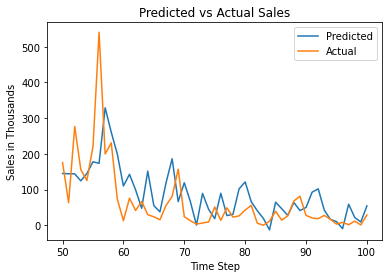

In [27]:
import matplotlib.pyplot as plt

# Define the endogenous variable
endog = odf['Sales_in_thousands']

# Fit a SARIMA model with order=(2,1,1) and seasonal_order=(1,1,1,12)
model = SARIMAX(endog, order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Make predictions
start_idx = 50
end_idx = 100
pred = result.predict(start=start_idx, end=end_idx, dynamic=False)

# Convert pred to a NumPy array
pred = np.array(pred)

# Plot predicted values
time_steps = range(start_idx, end_idx+1)
plt.plot(time_steps, pred, label='Predicted')

# Plot actual values
actual = odf['Sales_in_thousands'][start_idx:end_idx+1]
plt.plot(time_steps, actual, label='Actual')

plt.xlabel('Time Step')
plt.ylabel('Sales in Thousands')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt.show()


In [41]:
# from datetime import datetime, timedelta
# import numpy as np

# # Convert 'Latest_Launch' column to datetime
# odf['Latest_Launch'] = pd.to_datetime(odf['Latest_Launch'], errors='coerce')

# # Drop rows with missing values in 'Latest_Launch'
# odf.dropna(subset=['Latest_Launch'], inplace=True)

# # Define the endogenous variable
# endog = odf['Sales_in_thousands']

# # Fit a SARIMA model with order=(2,1,1) and seasonal_order=(1,1,1,12)
# model = SARIMAX(endog, order=(2,1,1), seasonal_order=(1,1,1,12))
# result = model.fit()

# # Get the last date in the dataset
# last_date = odf['Latest_Launch'].max()

# # Define the number of future weeks to predict
# num_weeks = 12

# # Set the start date for the future period
# start_date = last_date + timedelta(weeks=1)

# # Make predictions for the future period
# pred = result.predict(start=start_date, periods=num_weeks, dynamic=False)

# # Convert pred to a NumPy array
# pred = np.array(pred)




# # Print predicted values
# print("Predicted values for future weeks:")
# for i in range(len(pred)):
#     print(f"Week {i+1}: {pred[i]}")


# deep learning
